# Data Loading and Basic Inspection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [4]:
df = pd.read_csv("D:\\SEM - 6\\MLDL\\ML\\Cardio-ML-Project\\data\\cardio_train.csv", sep=";")

Show dataset shape

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (70000, 13)


Data Information

In [6]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


First 5 rows

In [7]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Summary Statistics and Target Analysis

Summary statistics

In [8]:
print("Summary statistics:")
df.describe()

Summary statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Target variable analysis

In [9]:
print("\nTarget distribution:")
print(df['cardio'].value_counts(normalize=True))


Target distribution:
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


Age in days to years

In [10]:
df['age_years'] = (df['age'] / 365).round(1)
print("\nAge range:", df['age_years'].min(), "to", df['age_years'].max(), "years")


Age range: 29.6 to 65.0 years


# Data Quality Checks

Check unique values in categorical columns

In [11]:
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values - {df[col].value_counts()}")

gender: 2 unique values - gender
1    45530
2    24470
Name: count, dtype: int64
cholesterol: 3 unique values - cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64
gluc: 3 unique values - gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64
smoke: 2 unique values - smoke
0    63831
1     6169
Name: count, dtype: int64
alco: 2 unique values - alco
0    66236
1     3764
Name: count, dtype: int64
active: 2 unique values - active
1    56261
0    13739
Name: count, dtype: int64


Check for unusual values

In [12]:
print("\nHeight range:", df['height'].min(), "-", df['height'].max())
print("Weight range:", df['weight'].min(), "-", df['weight'].max())
print("Missing values:", df.isnull().sum().sum())


Height range: 55 - 250
Weight range: 10.0 - 200.0
Missing values: 0


# Visualizations and EDA

Outlier Check:


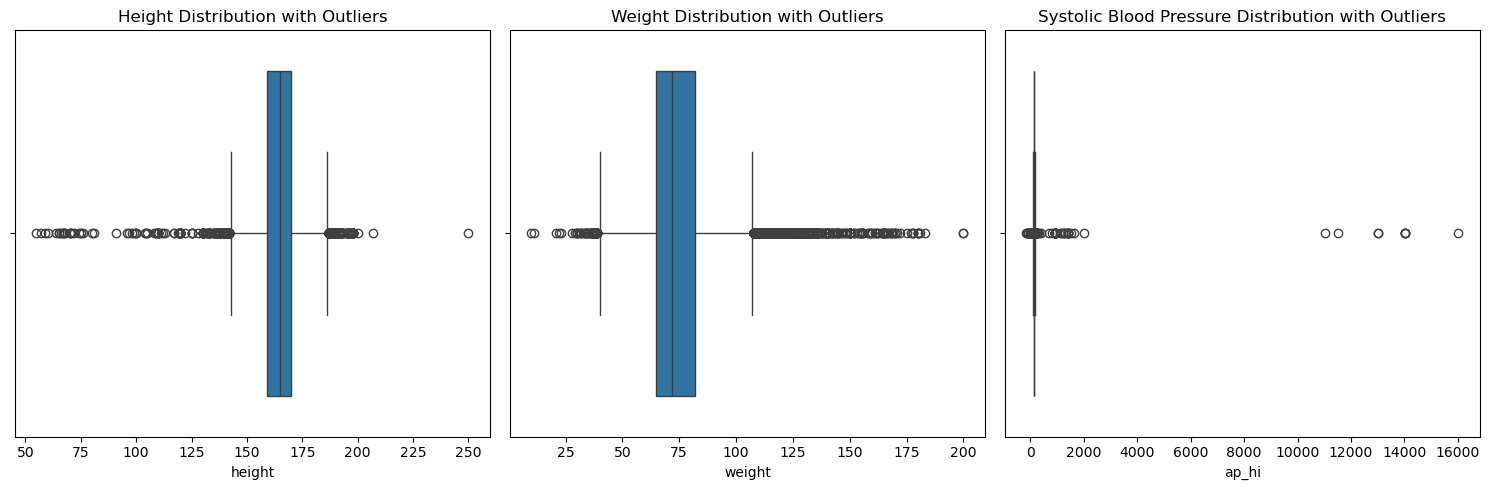

In [13]:
# Outliers
# Check height/weight/blood pressure values
print("Outlier Check:")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['height'])
plt.title('Height Distribution with Outliers')
plt.subplot(1, 3, 2)
sns.boxplot(x=df['weight'])
plt.title('Weight Distribution with Outliers')
plt.subplot(1, 3, 3)
sns.boxplot(x=df['ap_hi'])
plt.title('Systolic Blood Pressure Distribution with Outliers')
plt.tight_layout()
plt.show()


# Correlation Analysis

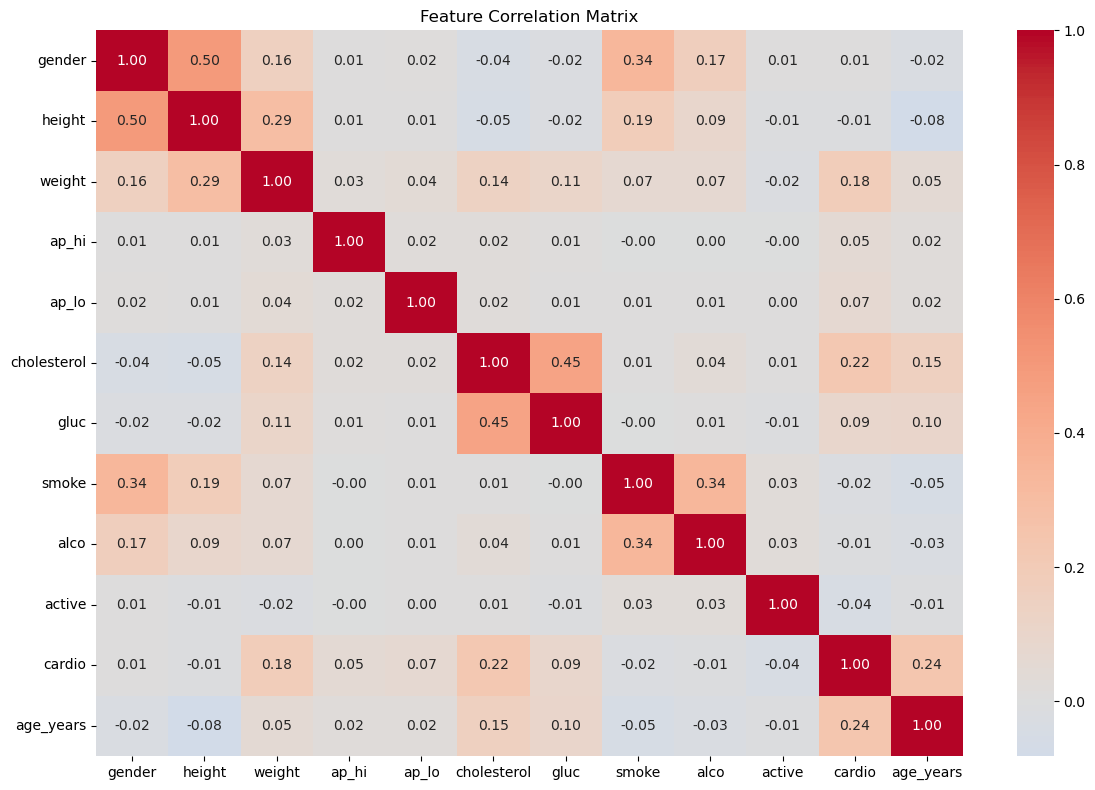

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.drop(['id', 'age'], axis=1).corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Target vs Key Features

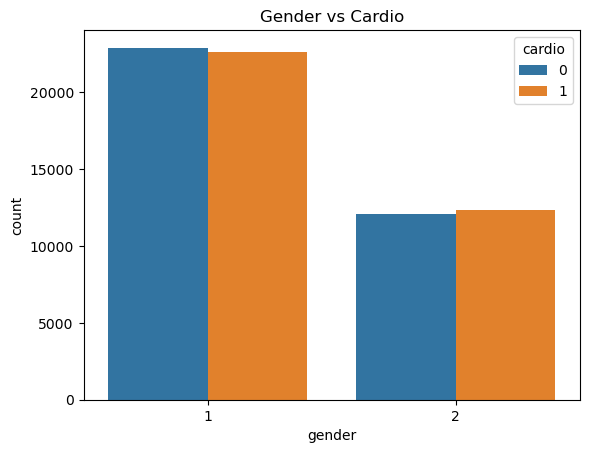

In [15]:
# Gender vs Cardio
sns.countplot(x='gender', hue='cardio', data=df)
plt.title("Gender vs Cardio")
plt.show()

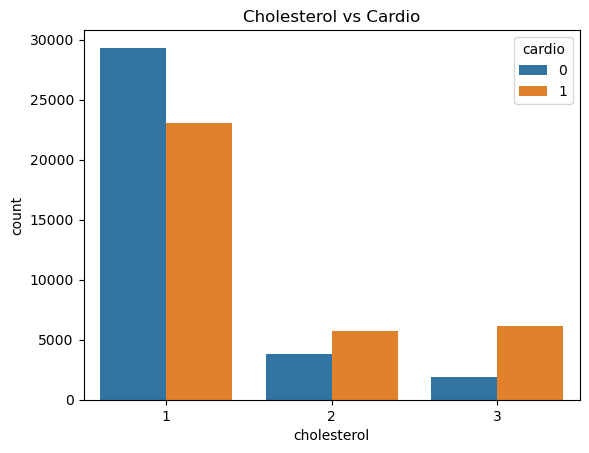

In [16]:
# Cholesterol vs Cardio
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol vs Cardio")
plt.show()

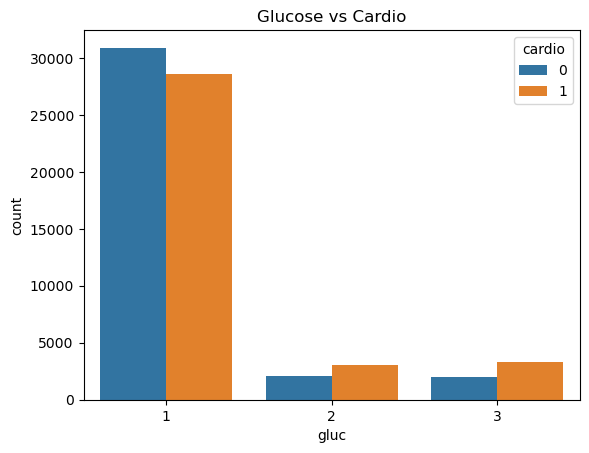

In [17]:
# Glucose vs Cardio
sns.countplot(x='gluc', hue='cardio', data=df)
plt.title("Glucose vs Cardio")
plt.show()

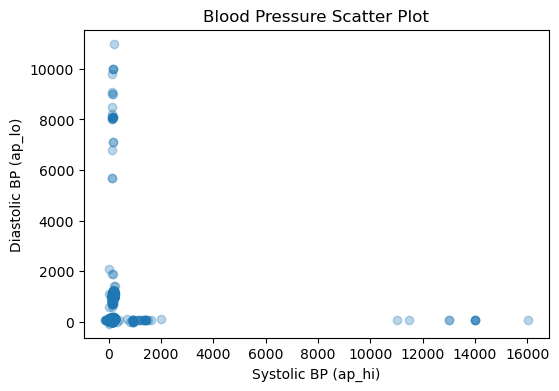

In [18]:
# BP Relationship (Scatter Plot)
plt.figure(figsize=(6,4))
plt.scatter(df['ap_hi'], df['ap_lo'], alpha=0.3)
plt.xlabel("Systolic BP (ap_hi)")
plt.ylabel("Diastolic BP (ap_lo)")
plt.title("Blood Pressure Scatter Plot")
plt.show()

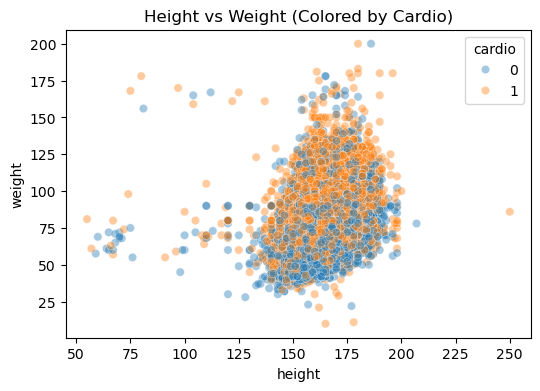

In [19]:
# Height vs Weight (BMI Pattern)
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['height'], y=df['weight'], hue=df['cardio'], alpha=0.4)
plt.title("Height vs Weight (Colored by Cardio)")
plt.show()